In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Data Exploration (Data is in well condition)

In [3]:
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [5]:
train_df.shape

(15289, 18)

In [6]:
test_df.shape

(10194, 17)

In [7]:
#df = pd.concat([train_df, test_df], ignore_index=True)

# Outlier Dealing

In [8]:
df_outlier = train_df.drop(columns=['id'])

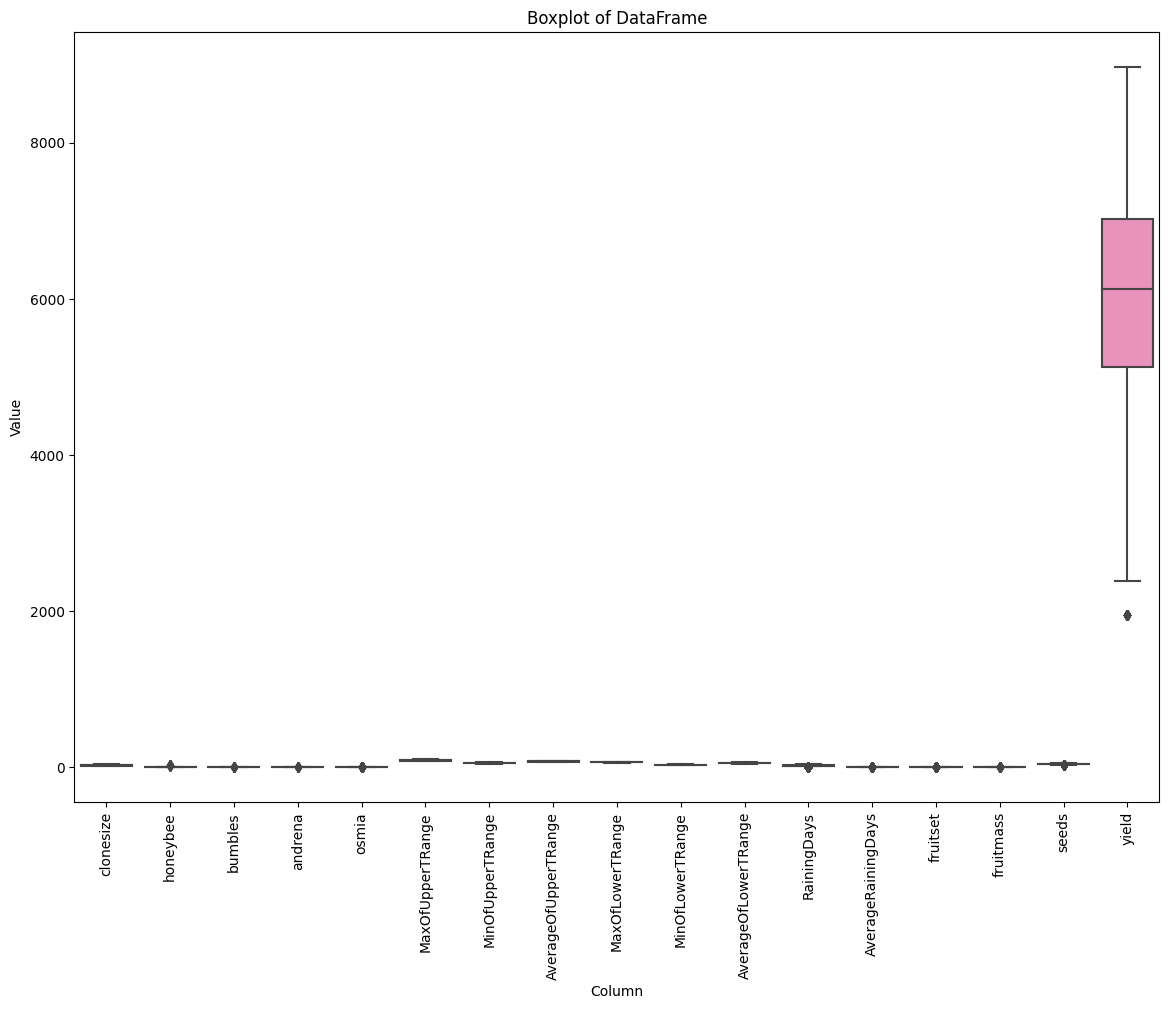

In [9]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(data=df_outlier, ax=ax)

ax.set_title('Boxplot of DataFrame')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

plt.xticks(rotation=90)

plt.show()

# Checking Target Balance

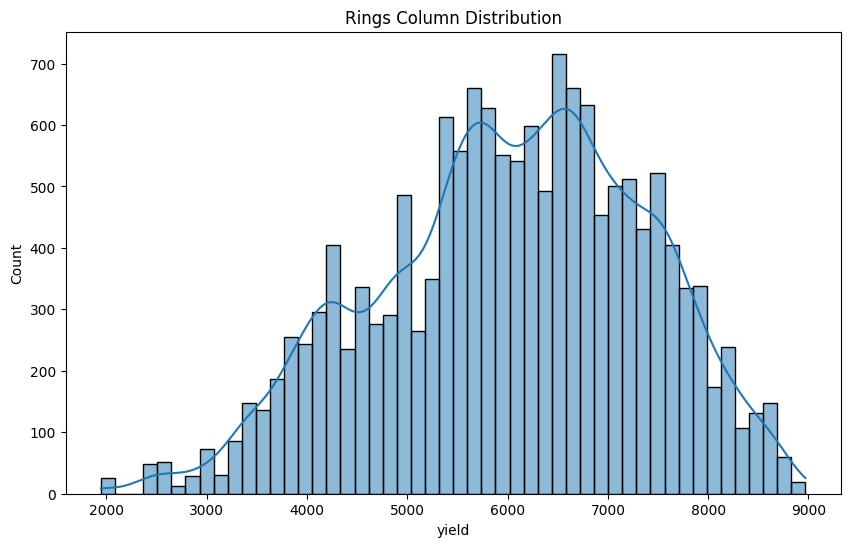

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['yield'], kde=True, bins=50)
plt.title('Rings Column Distribution')
plt.show()


### ..data is also well balanced

In [11]:
train_df['yield'].describe()

count    15289.000000
mean      6025.193999
std       1337.056850
min       1945.530610
25%       5128.163510
50%       6117.475900
75%       7019.694380
max       8969.401840
Name: yield, dtype: float64

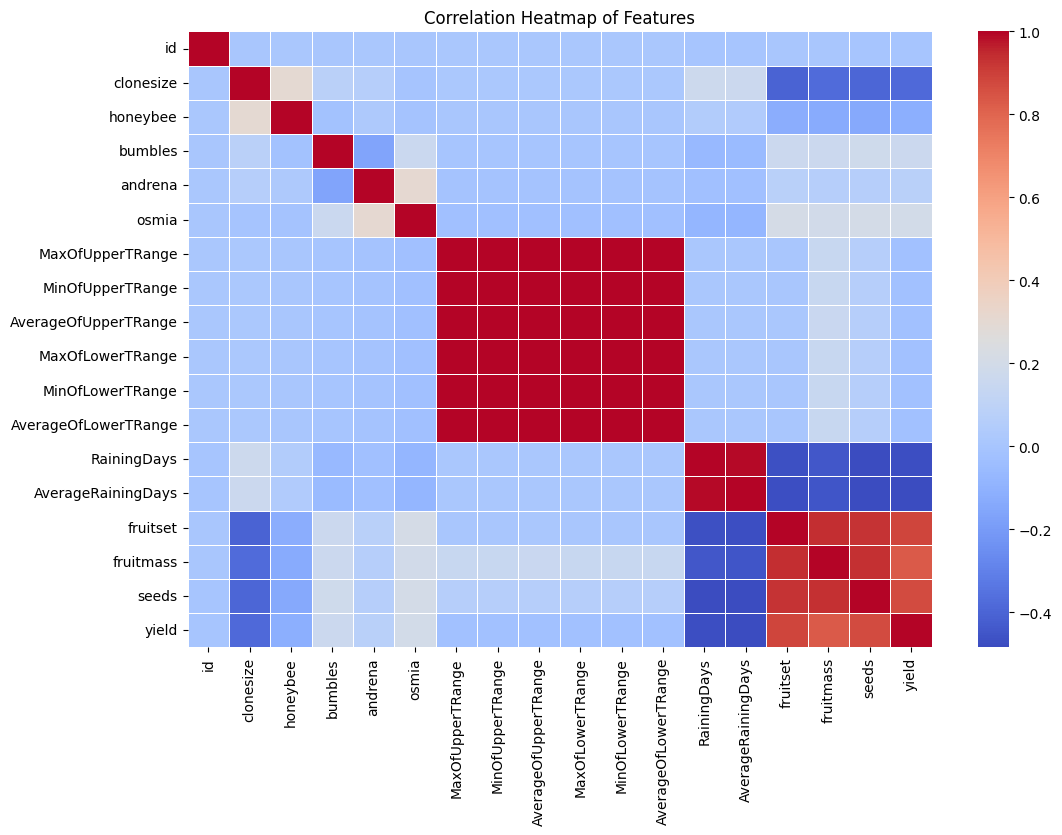

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [13]:
abs(train_df.corr(numeric_only=True)['yield'].sort_values(ascending=False))

yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
osmia                   0.198264
bumbles                 0.161145
andrena                 0.073969
id                      0.000975
MinOfUpperTRange        0.021929
AverageOfUpperTRange    0.021940
AverageOfLowerTRange    0.022081
MaxOfLowerTRange        0.022197
MinOfLowerTRange        0.022319
MaxOfUpperTRange        0.022517
honeybee                0.118001
clonesize               0.382619
RainingDays             0.477191
AverageRainingDays      0.483870
Name: yield, dtype: float64

In [14]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [15]:
df = df[['fruitset','seeds','fruitmass','osmia','bumbles','clonesize','AverageRainingDays','honeybee','yield']]

In [16]:
df.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield
0,0.425011,32.460887,0.417545,0.50,0.25,25.0,0.39,0.50,4476.81146
1,0.444908,33.858317,0.422051,0.50,0.25,25.0,0.39,0.50,5548.12201
2,0.552927,38.341781,0.470853,0.63,0.25,12.5,0.39,0.25,6869.77760
3,0.565976,39.467561,0.478137,0.50,0.25,12.5,0.39,0.25,6880.77590
4,0.579677,40.484512,0.494165,0.63,0.25,25.0,0.39,0.50,7479.93417


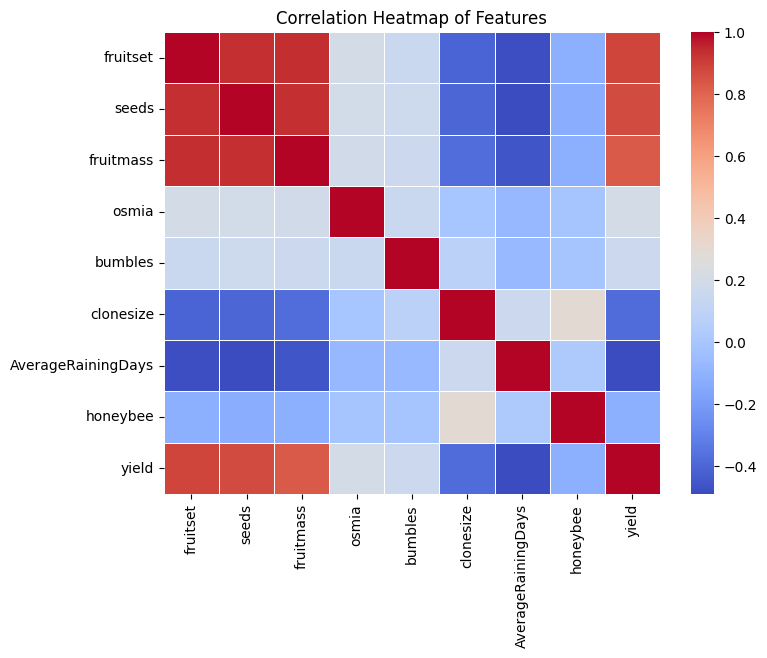

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [18]:
df.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield
0,0.425011,32.460887,0.417545,0.50,0.25,25.0,0.39,0.50,4476.81146
1,0.444908,33.858317,0.422051,0.50,0.25,25.0,0.39,0.50,5548.12201
2,0.552927,38.341781,0.470853,0.63,0.25,12.5,0.39,0.25,6869.77760
3,0.565976,39.467561,0.478137,0.50,0.25,12.5,0.39,0.25,6880.77590
4,0.579677,40.484512,0.494165,0.63,0.25,25.0,0.39,0.50,7479.93417


### ..as we can see below we have no highly correlated columns now.

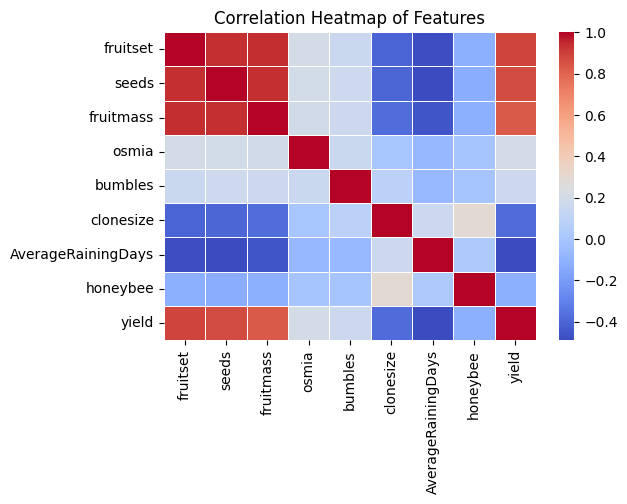

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [20]:
abs(df.corr(numeric_only=True)['yield'].sort_values(ascending=False))

yield                 1.000000
fruitset              0.885967
seeds                 0.868853
fruitmass             0.826481
osmia                 0.198264
bumbles               0.161145
honeybee              0.118001
clonesize             0.382619
AverageRainingDays    0.483870
Name: yield, dtype: float64

# Kmeans Clustering to form a new robust feature that is kind of the bin representation of the features that willprobably boost performance

In [21]:
features = df.drop(columns=['yield'])

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_1 = StandardScaler()
scaled_features = scaler_1.fit_transform(features)

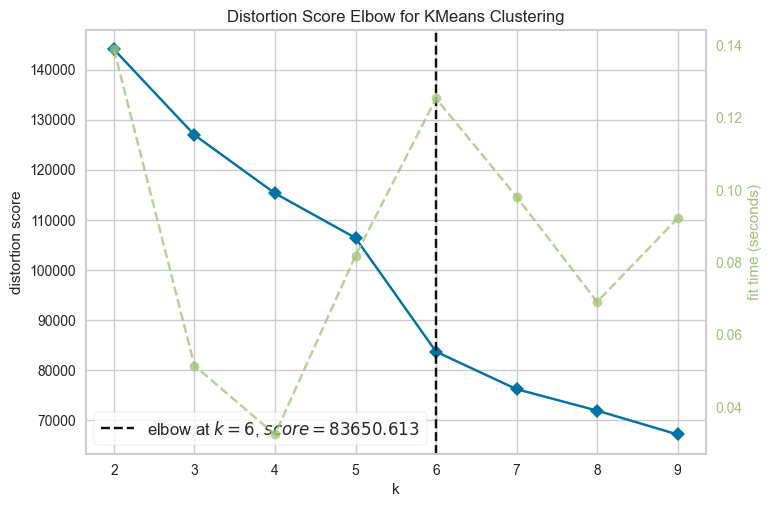

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(scaled_features)
vis.show()

In [25]:
kmeans = KMeans(n_clusters=6, random_state=42)
model = kmeans.fit(scaled_features)

In [26]:
prediction = model.predict(scaled_features)

In [27]:
features['yield_segment'] = prediction

In [28]:
features.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield_segment
0,0.425011,32.460887,0.417545,0.50,0.25,25.0,0.39,0.50,3
1,0.444908,33.858317,0.422051,0.50,0.25,25.0,0.39,0.50,4
2,0.552927,38.341781,0.470853,0.63,0.25,12.5,0.39,0.25,2
3,0.565976,39.467561,0.478137,0.50,0.25,12.5,0.39,0.25,1
4,0.579677,40.484512,0.494165,0.63,0.25,25.0,0.39,0.50,0


In [29]:
features['yield'] = df['yield']

In [30]:
abs(features.corr(numeric_only=True)['yield'].sort_values(ascending=False))

yield                 1.000000
fruitset              0.885967
seeds                 0.868853
fruitmass             0.826481
osmia                 0.198264
bumbles               0.161145
honeybee              0.118001
clonesize             0.382619
AverageRainingDays    0.483870
yield_segment         0.591854
Name: yield, dtype: float64

In [31]:
df = features.copy()

## Normally we would apply Classification to predict yield segments on the test data, but this time (with this method) we didnt utilize the target column to form the segments, so we wont need to predict the segments.

In [32]:
df.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield_segment,yield
0,0.425011,32.460887,0.417545,0.50,0.25,25.0,0.39,0.50,3,4476.81146
1,0.444908,33.858317,0.422051,0.50,0.25,25.0,0.39,0.50,4,5548.12201
2,0.552927,38.341781,0.470853,0.63,0.25,12.5,0.39,0.25,2,6869.77760
3,0.565976,39.467561,0.478137,0.50,0.25,12.5,0.39,0.25,1,6880.77590
4,0.579677,40.484512,0.494165,0.63,0.25,25.0,0.39,0.50,0,7479.93417


In [33]:
df.isna().sum()

fruitset                  0
seeds                     0
fruitmass                 0
osmia                     0
bumbles                   0
clonesize                 0
AverageRainingDays        0
honeybee                  0
yield_segment             0
yield                 10194
dtype: int64

In [34]:
test_df = df[df['yield'].isnull()] #null rows 

df = df[df['yield'].notnull()]

In [35]:
x = df.drop('yield',axis=1)
y = df[['yield']]

In [36]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
# Base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),  
    ('svr', SVR()), 
    ('lr', LinearRegression()),
    ('els', ElasticNet()),
    ('gr', GradientBoostingRegressor())
]

# Meta-model
meta_model = HuberRegressor()  # outlier resistant algorithm

In [39]:
# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [40]:
model = stacking_model.fit(x_train, y_train)

In [41]:
model

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('svr', SVR()), ('lr', LinearRegression()),
                              ('els', ElasticNet()),
                              ('gr', GradientBoostingRegressor())],
                  final_estimator=HuberRegressor())

In [42]:
# Make predictions on the test set
prediction = stacking_model.predict(x_test)

r2 = r2_score(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = mean_squared_error(y_test,prediction)**.5

print('I---------------------*---------------------I')
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # competition metric
print('I---------------------*---------------------I')
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

I---------------------*---------------------I
Mean Absolute Error (MAE): 345.6862
I---------------------*---------------------I
R-squared (R²): 0.8230
Root Mean Squared Error (RMSE): 557.7479


In [43]:
import pickle

with open('model_blue.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler_blue.pkl', 'wb') as f:
    pickle.dump(scaler_1, f)


In [44]:
with open('model_blue.pkl', 'rb') as file:
    model_loaded = pickle.load(file)

In [45]:
test_df.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield_segment,yield
15289,0.399367,31.394569,0.408088,0.25,0.25,25.0,0.39,0.25,3,NaN
15290,0.488048,36.846956,0.442866,0.63,0.25,12.5,0.10,0.25,2,NaN
15291,0.583379,40.037644,0.487057,0.63,0.25,12.5,0.26,0.25,1,NaN
15292,0.433014,33.116091,0.422847,0.63,0.38,25.0,0.26,0.50,4,NaN
15293,0.360996,29.558019,0.388860,0.25,0.25,37.5,0.39,0.75,3,NaN


In [46]:
test_df = test_df.reset_index(drop=True)

In [47]:
test_df = test_df.drop('yield',axis=1)

In [48]:
prediction = model.predict(test_df)

In [49]:
test_df['yield'] = prediction

In [50]:
test_df.head()

,fruitset,seeds,fruitmass,osmia,bumbles,clonesize,AverageRainingDays,honeybee,yield_segment,yield
0,0.399367,31.394569,0.408088,0.25,0.25,25.0,0.39,0.25,3,4247.779301
1,0.488048,36.846956,0.442866,0.63,0.25,12.5,0.10,0.25,2,6123.346180
2,0.583379,40.037644,0.487057,0.63,0.25,12.5,0.26,0.25,1,7192.225512
3,0.433014,33.116091,0.422847,0.63,0.38,25.0,0.26,0.50,4,4742.517532
4,0.360996,29.558019,0.388860,0.25,0.25,37.5,0.39,0.75,3,3640.291342


In [51]:
id_test = pd.read_csv('test.csv')

In [53]:
submission_df = pd.DataFrame({
    'id': id_test['id'],
    'yield': test_df['yield']
})

In [54]:
submission_df.to_csv('submission.csv', index=False)